# Instructions for Project 1 - Sentiment Analysis

Hello everyone, this is Quyet. I am glad to host the first project. My email is *vqdo@connect.ust.hk*. Feel free to send me an email if you have any problem regarding this project.

In this project, you will try to work on a sentiment analysis task.
You will build a model to predict the scores (a.k.a. the "stars" column in datasets, from 1 to 5) of each review.
For each review, you are given a piece of text as well as some other features (Explore yourself! You may look at the columns of the data).
You can consider the predicted variables as categorical, ordinal or numerical.

Just a kind note: The codes and techniques introduced in the previous tutorials may come in handy. You can refer to the .ipynb notebooks for details.

## Important dates, submission requirements and grading policy 
**Important dates:**
- *March 16, 2023 (Thursday)*: Project starts
- *March 23, 2023 (Thursday)*: Release the validation score of a weak baseline
- *March 30, 2023 (Thursday)* Release the validation score of a strong baseline
- *April 13, 2023, 23:59 (Thursday)*: `Submission Deadline`

**Submission requirements:**  
Each team leader is required to submit the groupNo.zip file in the Canvas. It shoud contain 
- `pred.csv`: Predictions on test data (please make sure you can successfully evaluate your validation predictions on the validation data with the help of evaluate.py). The file should contain two so-called columns, which are `review_id`
and `stars`.
- report (1-2 pages of pdf)
- code (Frameworks and programming languages are not restricted)

**Grading policy:**  
We will check your report with your code and your model performance (in terms of macro F1) on the test set.

| Grade | Classifier (80%)                                                   | Report (20%)                      |
|-------|--------------------------------------------------------------------|-----------------------------------|
| 50%   | example code in tutorials or in Project 1 without any modification | submission                        |
| 60%   | an easy baseline that most students can outperform                 | algorithm you used                |
| 80%   | a competitive baseline that about half students can surpass        | detailed explanation              |
| 90%   | a very competitive baseline without any special mechanism          | detailed explanation and analysis, such as explorative data analysis and ablation study |
| 100%  | a very competitive baseline with at least one mechanism            | excellent ideas, detailed explanation and solid analysis |



## Instruction Content
In this notebook, you are provided with the code snippets to start with.

The content follows previous lectures and tutorials. But some potentially useful python packages are also mentioned.

1. Loading data and saving predictions
    1. Loading data
    1. Saving predictions to file
1. Preprocessing
    1. Text data processing recap
    1. Explorative data analysis
1. Learning Baselines

## 1. Loading data and saving predictions

The same as previous tutorials, we use `pandas` as the basic tool to load & dump the data.
The key ingredient of our operation is the `DataFrame` in pandas.

In [1]:
import pandas as pd

In [ ]:
# if you use Google Colab, un-comment this cell, modify `path_to_data` if needed, and run to mount data to `data`
# from google.colab import drive
# drive.mount('/content/drive')

# path_to_data = '/content/drive/MyDrive/HKUST stuff/COMP4332_Project1/data'
# !rm -f data
# !ln -s '/content/drive/MyDrive/HKUST stuff/COMP4332_Project1/data' data

### A. Loading data

The following code shows how to load the datasets for this project.  
Among which, we do not release the labels (the "stars" column) for the test set. 
You may evaluate your trained model on the validation set instead.
However, your submitted predictions (``pred.csv``) should be generated on the test set.

Each year we release different data, so old models are not guaranteed to solve the new data.

In [4]:
def load_data(split_name='train', columns=['text', 'stars'], folder='data'):
    '''
        "split_name" may be set as 'train', 'valid' or 'test' to load the corresponding dataset.
        
        You may also specify the column names to load any columns in the .csv data file.
        Among many, "text" can be used as model input, and "stars" column is the labels (sentiment). 
        If you like, you are free to use columns other than "text" for prediction.
    '''
    try:
        print(f"select [{', '.join(columns)}] columns from the {split_name} split")
        df = pd.read_csv(f'{folder}/{split_name}.csv')
        df = df.loc[:,columns]
        print("Success")
        return df
    except:
        print(f"Failed loading specified columns... Returning all columns from the {split_name} split")
        df = pd.read_csv(f'{folder}/{split_name}.csv')
        return df

Then you can extract the data by specifying the desired split and columns

In [5]:
train_df = load_data('train', columns=['text', 'stars'], folder='data')
valid_df = load_data('valid', columns=['text', 'stars'], folder='data')
# the test set labels (the 'stars' column) are not available! So the following code will instead return all columns
test_df = load_data('test', columns=['text', 'stars'], folder='data')

select [text, stars] columns from the train split
Success
select [text, stars] columns from the valid split
Success
select [text, stars] columns from the test split
Failed loading specified columns... Returning all columns from the test split


In [6]:
train_df.head()

,text,stars
0,Best Sunday buffet in the two cities of Charlo...,5
1,My friends and I decided to check out this pla...,4
2,This is definitely New York Chinese food! The ...,5
3,Beaucoup moins de choix que son voisin d'en fa...,3
4,"Location is nice, but it is the typical blah H...",2


In [8]:
test_df.head()

,business_id,cool,date,funny,review_id,text,useful,user_id
0,V-qDa2kr5qWdhs7PU-l-3Q,0,2013-05-29,0,fBHWLNEJmhk6AkzmfLwWcw,Would like to give this more stars - usually I...,1,1pigoFijaHVWGrQl1_tYjw
1,C1zlvNlxlGZB8g0162QslQ,0,2012-03-02 15:51:49,0,ldEQ02aP1OeSa5N2beseNg,My wife and I took some friends here after din...,0,BKWPuPZFcGmgjRFRzoq1pw
2,0FOON_PNvG0ZxIZh6Jcv2A,0,2013-09-24 20:31:37,0,0oGr6v9VjtRsRsROGMoWTA,My husband and I had lunch here for the first ...,0,BYVYXKqNs-vv-N1ZhRMs0g
3,r49iBfbnfoK7yt4rdsL_7g,0,2018-10-20 01:34:08,0,eg5eJ5HmqXuzkxucnKvMTw,I love coming here with my friends! Great for ...,2,dpzmyNglDMeTgV3T5ylUSQ
4,xnLNPkL7bbdhD842T4oPqg,0,2016-09-25,1,BNDAe34Mxj--Brkzcfi4QA,Make sure that you double check how much these...,1,yk9wx31bfMEe_IXB8Q-ylA


In [10]:
print(len(train_df), len(valid_df), len(test_df))

18000 2000 4000


### B. Saving predictions to file

Your submitted predictions are supposed to be a .csv file containing two columns, i.e. (``review_id`` and ``stars``). 

Here, as an example, we generate some random predictions as our answer, which are put in a DataFrame and output to a .csv file

After getting your model predictions on the test set, you may follow these steps to generate your ``pred.csv`` file. (By replacing the random predictions with your model predictions)

In [11]:
import numpy as np

In [12]:
random_pred = pd.DataFrame(data={
    'review_id': test_df['review_id'],
    'stars': np.random.randint(0, 6, size=len(test_df))
})

In [13]:
random_pred.head()

,review_id,stars
0,fBHWLNEJmhk6AkzmfLwWcw,0
1,ldEQ02aP1OeSa5N2beseNg,2
2,0oGr6v9VjtRsRsROGMoWTA,3
3,eg5eJ5HmqXuzkxucnKvMTw,3
4,BNDAe34Mxj--Brkzcfi4QA,2


In [14]:
random_pred.to_csv(f'random_pred.csv', index=False)

Then, you will get a ``random_pred.csv`` in your folder.

## 2. Preprocessing

Here are some preprocessing examples for your reference. For more details you may refer to the previous tutorials.

### A. Text data processing recap
In the tutorials, we have shown how to extract textual features using the `nltk` package

Remember to use the NLTK Downloader to obtain the resource first:
```
  >>> import nltk
  >>> nltk.download('stopwords')
  >>> nltk.download('punkt')
```

In [16]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
ps = PorterStemmer()

def lower(s):
    """
    :param s: a string.
    return a string with lower characters
    Note that we allow the input to be nested string of a list.
    e.g.
    Input: 'Text mining is to identify useful information.'
    Output: 'text mining is to identify useful information.'
    """
    if isinstance(s, list):
        return [lower(t) for t in s]
    if isinstance(s, str):
        return s.lower()
    else:
        raise NotImplementedError("unknown datatype")


def tokenize(text):
    """
    :param text: a doc with multiple sentences, type: str
    return a word list, type: list
    e.g.
    Input: 'Text mining is to identify useful information.'
    Output: ['Text', 'mining', 'is', 'to', 'identify', 'useful', 'information', '.']
    """
    return nltk.word_tokenize(text)


def stem(tokens):
    """
    :param tokens: a list of tokens, type: list
    return a list of stemmed words, type: list
    e.g.
    Input: ['Text', 'mining', 'is', 'to', 'identify', 'useful', 'information', '.']
    Output: ['text', 'mine', 'is', 'to', 'identifi', 'use', 'inform', '.']
    """
    ### equivalent code
    # results = list()
    # for token in tokens:
    #     results.append(ps.stem(token))
    # return results

    return [ps.stem(token) for token in tokens]

def n_gram(tokens, n=1):
    """
    :param tokens: a list of tokens, type: list
    :param n: the corresponding n-gram, type: int
    return a list of n-gram tokens, type: list
    e.g.
    Input: ['text', 'mine', 'is', 'to', 'identifi', 'use', 'inform', '.'], 2
    Output: ['text mine', 'mine is', 'is to', 'to identifi', 'identifi use', 'use inform', 'inform .']
    """
    if n == 1:
        return tokens
    else:
        results = list()
        for i in range(len(tokens)-n+1):
            # tokens[i:i+n] will return a sublist from i th to i+n th (i+n th is not included)
            results.append(" ".join(tokens[i:i+n]))
        return results

def filter_stopwords(tokens):
    """
    :param tokens: a list of tokens, type: list
    return a list of filtered tokens, type: list
    e.g.
    Input: ['text', 'mine', 'is', 'to', 'identifi', 'use', 'inform', '.']
    Output: ['text', 'mine', 'identifi', 'use', 'inform', '.']
    """
    ### equivalent code
    # results = list()
    # for token in tokens:
    #     if token not in stopwords and not token.isnumeric():
    #         results.append(token)
    # return results

    return [token for token in tokens if token not in stopwords and not token.isnumeric()]

import numpy as np

def get_onehot_vector(feats, feats_dict):
    """
    :param data: a list of features, type: list
    :param feats_dict: a dict from features to indices, type: dict
    return a feature vector,
    """
    # initialize the vector as all zeros
    vector = np.zeros(len(feats_dict), dtype=np.float)
    for f in feats:
        # get the feature index, return -1 if the feature is not existed
        f_idx = feats_dict.get(f, -1)
        if f_idx != -1:
            # set the corresponding element as 1
            vector[f_idx] = 1
    return vector

Note that you can use the `map` function to apply your preprocessing functions into the dataframe.

In [17]:
test_df['tokens'] = test_df['text'].map(tokenize).map(filter_stopwords).map(lower)
print(test_df['tokens'].head().to_string())

0    [would, like, give, stars, -, usually, i, get,...
1    [my, wife, i, took, friends, dinner, advise, a...
2    [my, husband, i, lunch, first, time, years, .,...
3    [i, love, coming, friends, !, great, groups, o...
4    [make, sure, double, check, much, guys, chargi...


Besides `nltk`, `SpaCy` may also be useful.

You can explore it at https://spacy.io/

Let's install it with the following command (in terminal)

```bash
python -m pip install spacy
python -m spacy download en_core_web_sm
```

In [20]:
import spacy
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


You may use spacy to extract linguistic features from texts

Example:

In [21]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

fmt = "{:10s},\t " * 8
print(fmt.format('raw', 'stem', 'PartOfSpeech', 'dependency', 'shape', 'is alpha', 'is stop', 'its childrens in the parsing tree'))
print('-'*140)
for token in doc:
    print(fmt.format(token.text, token.lemma_, token.pos_, token.dep_,
            token.shape_, str(token.is_alpha), str(token.is_stop), str(list(token.children))))

raw       ,	 stem      ,	 PartOfSpeech,	 dependency,	 shape     ,	 is alpha  ,	 is stop   ,	 its childrens in the parsing tree,	 
--------------------------------------------------------------------------------------------------------------------------------------------
Apple     ,	 Apple     ,	 PROPN     ,	 nsubj     ,	 Xxxxx     ,	 True      ,	 False     ,	 []        ,	 
is        ,	 be        ,	 AUX       ,	 aux       ,	 xx        ,	 True      ,	 True      ,	 []        ,	 
looking   ,	 look      ,	 VERB      ,	 ROOT      ,	 xxxx      ,	 True      ,	 False     ,	 [Apple, is, at],	 
at        ,	 at        ,	 ADP       ,	 prep      ,	 xx        ,	 True      ,	 True      ,	 [buying]  ,	 
buying    ,	 buy       ,	 VERB      ,	 pcomp     ,	 xxxx      ,	 True      ,	 False     ,	 [U.K., startup],	 
U.K.      ,	 U.K.      ,	 PROPN     ,	 dobj      ,	 X.X.      ,	 False     ,	 False     ,	 []        ,	 
startup   ,	 startup   ,	 NOUN      ,	 dobj      ,	 xxxx      ,	 True      ,	 False     ,

SpaCy also allows you to use the embeddings for both sentence and words

Example:

In [22]:
print(doc, doc.vector[:5], '...')
for t in doc:
    print(t, t.vector[:5], '...')

Apple is looking at buying U.K. startup for $1 billion [-0.2135015  -0.07609898  0.62694854 -0.070923   -0.29589826] ...
Apple [-0.6407524   0.1070071   0.916491   -0.74928445  0.3258922 ] ...
is [ 2.0609407  -0.36327994  0.6264653   0.1308127  -0.19670653] ...
looking [-0.5980338   1.0319357  -0.44214967  0.25807524  0.2380197 ] ...
at [-0.6183219   0.36113417  2.8723578  -0.49887004 -1.2415948 ] ...
buying [-0.7019715  -0.60287285 -1.3441136   0.73866504 -0.5758997 ] ...
U.K. [-0.14623474 -0.31533432  0.07042789 -0.09671253 -0.21116358] ...
startup [-0.92503995 -0.06449679  0.20199871  0.39922577 -0.08832604] ...
for [ 0.5640686   0.30350792  3.897539    0.20021826 -0.9692602 ] ...
$ [ 0.95396423 -0.65844035  1.1860076  -0.13312785 -0.10497624] ...
1 [-0.33259743 -0.947511   -0.5805367  -0.2702187  -0.60174805] ...
billion [-1.9645385   0.3112617  -0.5080533  -0.75893646  0.17088217] ...


For more usage of SpaCy, you can refer to its documentation at this link: https://spacy.io/usage

### B. Explorative data analysis

For our dataset, there are features more than texts

In [23]:
train_df_full = load_data('train', columns='full')

select [f, u, l, l] columns from the train split
Failed loading specified columns... Returning all columns from the train split


In [24]:
train_df_full.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,JYgoAQHdJWKPArQDvBEBng,0,2016-03-30 21:40:34,0,JlUcJiIy24pw5jStCLtavg,5,Best Sunday buffet in the two cities of Charlo...,1,SxLNrLxHm0aEw-kLrbPLew
1,AASa5G_OHCxGQ0tbjT_2tw,0,2018-08-30 02:50:46,0,xJBrURoI6Tm7PCmytXUMyg,4,My friends and I decided to check out this pla...,0,aW22TlXwhkUUqBYFG7fbTA
2,Z2xuK4BbrD0Qr9dAs7oTVw,0,2017-02-20,0,99wD_l4D6Sw7Kesaq9GPhg,5,This is definitely New York Chinese food! The ...,4,SerdK2DW_2R7z1b9WU97fg
3,YAMXCiebYV49_B8lDAaLxA,0,2017-04-06 21:56:41,0,AmNFz9svFx9QCSZsUs8JTA,3,Beaucoup moins de choix que son voisin d'en fa...,0,pf4nr7_PlMrHjbmQYbEFcQ
4,ynvp3qvt3xc321dLKFxpgA,0,2012-03-09 19:30:47,0,nwnlKZN2MWhyL3aKUqY7ig,2,"Location is nice, but it is the typical blah H...",2,Mf5TQEqn59k_TapTpfjYdA


You can explore the relationship between different features

In [25]:
import matplotlib.pyplot as plt

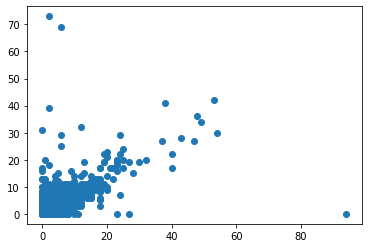

In [26]:
plt.scatter(train_df_full['cool'], train_df_full['funny'])

(array([2659., 1426., 1969., 4008., 7938.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

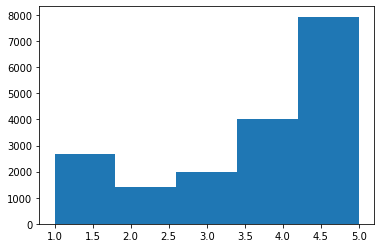

In [27]:
plt.hist(train_df_full['stars'], bins=5)

Moreover, you may use the id feature to aggregate data samples

For example

                  business_id  funny  cool  stars
654    --9e1ONYQuAa-CB_Rrw7Tw      3     9      4
3248   --9e1ONYQuAa-CB_Rrw7Tw      0     2      4
12008  --9e1ONYQuAa-CB_Rrw7Tw      0     0      3
12769  --9e1ONYQuAa-CB_Rrw7Tw      0     1      4


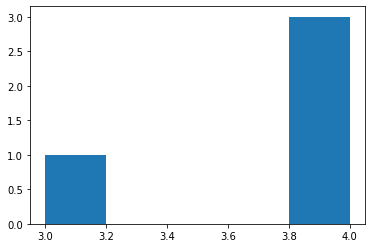

In [28]:
for bid, sub_df in train_df_full.groupby('business_id'):
    if len(sub_df) > 1:
        print(sub_df[['business_id', 'funny', 'cool', 'stars']].head())
        plt.hist(sub_df['stars'], bins=5)
        break

In [29]:
for bid, sub_df in train_df_full.groupby('user_id'):
    if len(sub_df) > 1:
        print(sub_df[['user_id', 'funny', 'cool', 'stars']].head())
        break

                      user_id  funny  cool  stars
8730   -0HhZbPBlB1YZx3BhAfaEA      0     0      4
16969  -0HhZbPBlB1YZx3BhAfaEA      2     2      5


## 3. Baselines

Finally, we provide two example baselines for your reference. The first baseline extracts TF-iDF features from texts and use logistic regression to generate prediction. The second baseline uses Convolutional Neural Networks (CNNs) to generate prediction from texts.


We only use ''text'' data here, and only consider its first 5k training samples. It is just an example, you can use the data as you like.

### TF-IDF + LR

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

In [31]:
train_df = load_data('train')[:5000]
valid_df = load_data('valid')
x_train = train_df['text']
y_train = train_df['stars']
x_valid = valid_df['text']
y_valid = valid_df['stars']

select [text, stars] columns from the train split
Success
select [text, stars] columns from the valid split
Success


In [32]:
tfidf = TfidfVectorizer(tokenizer=tokenize)
lr = LogisticRegression()
steps = [('tfidf', tfidf),('lr', lr)]
pipe = Pipeline(steps)
print(pipe)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function tokenize at 0x7fea1bd60c10>)),
                ('lr', LogisticRegression())])


In [33]:
pipe.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function tokenize at 0x7fea1bd60c10>)),
                ('lr', LogisticRegression())])

In [34]:
y_pred = pipe.predict(x_valid)
print(classification_report(y_valid, y_pred))
print("\n\n")
print(confusion_matrix(y_valid, y_pred))
print('accuracy', np.mean(y_valid == y_pred))

              precision    recall  f1-score   support

           1       0.69      0.77      0.73       292
           2       0.45      0.09      0.14       163
           3       0.44      0.16      0.23       232
           4       0.44      0.42      0.43       421
           5       0.70      0.90      0.79       892

    accuracy                           0.63      2000
   macro avg       0.54      0.47      0.46      2000
weighted avg       0.59      0.63      0.59      2000




[[225   7  10  11  39]
 [ 67  14  18  40  24]
 [ 19   8  36 105  64]
 [  7   2  13 178 221]
 [ 10   0   4  74 804]]
accuracy 0.6285


### CNN

The second baseline is a CNN model implemented with PyTorch.

First, use the following command to install pytorch (in terminal).

```bash
pip install torch
```

In [35]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import tqdm

In [36]:
train_text = train_df['text'].map(tokenize).map(filter_stopwords).map(stem)
valid_text = valid_df['text'].map(tokenize).map(filter_stopwords).map(stem)

In [37]:
word2id = {}
for tokens in train_text:
    for t in tokens:
        if not t in word2id:
            word2id[t] = len(word2id)
word2id['<pad>'] = len(word2id)

In [38]:
def texts_to_id_seq(texts, padding_length=500):
    records = []
    for tokens in texts:
        record = []
        for t in tokens:
            record.append(word2id.get(t, len(word2id)))
        if len(record) >= padding_length:
            records.append(record[:padding_length])
        else:
            records.append(record + [word2id['<pad>']] * (padding_length - len(record)))
    return records

In [39]:
train_seqs = texts_to_id_seq(train_text)

In [40]:
valid_seqs = texts_to_id_seq(valid_text)

In [41]:
class MyDataset(Dataset):
    
    def __init__(self, seq, y):
        assert len(seq) == len(y)
        self.seq = seq
        self.y = y-1
    
    def __getitem__(self, idx):
        return np.asarray(self.seq[idx]), self.y[idx]

    def __len__(self):
        return len(self.seq)

In [42]:
batch_size = 16

train_loader = DataLoader(MyDataset(train_seqs, y_train), batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(MyDataset(valid_seqs, y_valid), batch_size=batch_size)

In [43]:
class mlp(nn.Module):
    def __init__(self):
        super(mlp, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=len(word2id)+1, embedding_dim=64)
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=64,
                      out_channels=64,
                      kernel_size=3,
                      stride=1),
            nn.MaxPool1d(kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Conv1d(in_channels=64,
                      out_channels=64,
                      kernel_size=3,
                      stride=1),
            nn.MaxPool1d(kernel_size=3, stride=1),
            nn.Dropout(0.5)
        )
        self.linear = nn.Linear(64, 5)
    
    def forward(self, x):
        x = self.embedding(x)
        x = torch.transpose(x, 1, 2)
        x = self.cnn(x)
        x = torch.max(x, dim=-1)[0]
        x = self.linear(x)
        return x

In [44]:
model = mlp()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = torch.nn.CrossEntropyLoss()

In [45]:
for e in range(1, 11):    
    print('epoch', e)
    model.train()
    total_acc = 0
    total_loss = 0
    total_count = 0
    with tqdm.tqdm(train_loader) as t:
        for x, y in t:
            optimizer.zero_grad()
            logits = model(x)
            loss = criterion(logits, y)
            loss.backward()
            total_acc += (logits.argmax(1) == y).sum().item()
            total_count += y.size(0)
            total_loss += loss.item()
            optimizer.step()
            t.set_postfix({'loss': total_loss/total_count, 'acc': total_acc/total_count})

    model.eval()
    y_pred = []
    y_true = []
    with tqdm.tqdm(valid_loader) as t:
        for x, y in t:
            logits = model(x)
            total_acc += (logits.argmax(1) == y).sum().item()
            total_count += len(y)
            y_pred += logits.argmax(1).tolist()
            y_true += y.tolist()
    print(classification_report(y_true, y_pred))
    print("\n\n")
    print(confusion_matrix(y_true, y_pred))

epoch 1


100%|██████████| 125/125 [00:06<00:00, 18.81it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.44      0.24      0.31       292
           1       0.00      0.00      0.00       163
           2       0.22      0.41      0.28       232
           3       0.31      0.03      0.06       421
           4       0.57      0.87      0.69       892

    accuracy                           0.48      2000
   macro avg       0.31      0.31      0.27      2000
weighted avg       0.41      0.48      0.40      2000




[[ 71   0  93   4 124]
 [ 22   0  63   8  70]
 [ 25   0  94  12 101]
 [ 22   0  92  13 294]
 [ 21   0  86   5 780]]
epoch 2


100%|██████████| 125/125 [00:05<00:00, 23.81it/s]


              precision    recall  f1-score   support

           0       0.43      0.62      0.51       292
           1       0.00      0.00      0.00       163
           2       0.38      0.13      0.20       232
           3       0.33      0.09      0.14       421
           4       0.59      0.92      0.72       892

    accuracy                           0.53      2000
   macro avg       0.35      0.35      0.31      2000
weighted avg       0.44      0.53      0.45      2000




[[181   0   6   7  98]
 [ 73   0  13  18  59]
 [ 71   2  31  30  98]
 [ 51   1  23  36 310]
 [ 47   2   8  18 817]]
epoch 3


100%|██████████| 125/125 [00:05<00:00, 22.62it/s]


              precision    recall  f1-score   support

           0       0.58      0.47      0.52       292
           1       0.21      0.46      0.29       163
           2       0.29      0.01      0.02       232
           3       0.32      0.52      0.39       421
           4       0.75      0.60      0.67       892

    accuracy                           0.48      2000
   macro avg       0.43      0.41      0.38      2000
weighted avg       0.54      0.48      0.48      2000




[[137  98   2  34  21]
 [ 25  75   2  50  11]
 [ 22  77   2 108  23]
 [ 21  58   1 220 121]
 [ 31  42   0 283 536]]
epoch 4


100%|██████████| 125/125 [00:03<00:00, 36.86it/s]


              precision    recall  f1-score   support

           0       0.54      0.68      0.61       292
           1       0.12      0.01      0.01       163
           2       0.28      0.33      0.30       232
           3       0.34      0.36      0.35       421
           4       0.72      0.73      0.72       892

    accuracy                           0.54      2000
   macro avg       0.40      0.42      0.40      2000
weighted avg       0.51      0.54      0.52      2000




[[200   1  34  21  36]
 [ 52   1  56  36  18]
 [ 44   3  77  70  38]
 [ 36   1  68 151 165]
 [ 35   2  45 161 649]]
epoch 5


100%|██████████| 125/125 [00:03<00:00, 31.27it/s]


              precision    recall  f1-score   support

           0       0.55      0.63      0.59       292
           1       0.25      0.03      0.05       163
           2       0.30      0.21      0.25       232
           3       0.35      0.37      0.36       421
           4       0.68      0.79      0.73       892

    accuracy                           0.55      2000
   macro avg       0.43      0.41      0.40      2000
weighted avg       0.51      0.55      0.52      2000




[[184   5  25  28  50]
 [ 53   5  35  44  26]
 [ 48   4  49  82  49]
 [ 23   4  32 157 205]
 [ 27   2  20 141 702]]
epoch 6


100%|██████████| 125/125 [00:03<00:00, 39.29it/s]


              precision    recall  f1-score   support

           0       0.47      0.79      0.59       292
           1       0.32      0.18      0.23       163
           2       0.32      0.13      0.18       232
           3       0.35      0.48      0.40       421
           4       0.76      0.64      0.69       892

    accuracy                           0.53      2000
   macro avg       0.44      0.44      0.42      2000
weighted avg       0.54      0.53      0.52      2000




[[232  12   9  20  19]
 [ 76  30  10  36  11]
 [ 62  20  30  93  27]
 [ 50  21  23 200 127]
 [ 70  11  21 220 570]]
epoch 7


100%|██████████| 125/125 [00:03<00:00, 37.84it/s]


              precision    recall  f1-score   support

           0       0.57      0.52      0.54       292
           1       0.21      0.21      0.21       163
           2       0.26      0.29      0.28       232
           3       0.38      0.17      0.23       421
           4       0.67      0.84      0.74       892

    accuracy                           0.54      2000
   macro avg       0.42      0.41      0.40      2000
weighted avg       0.51      0.54      0.51      2000




[[151  51  29   8  53]
 [ 44  35  42  11  31]
 [ 25  37  67  42  61]
 [ 23  24  74  70 230]
 [ 20  22  43  55 752]]
epoch 8


100%|██████████| 125/125 [00:06<00:00, 19.83it/s]


              precision    recall  f1-score   support

           0       0.56      0.56      0.56       292
           1       0.23      0.34      0.27       163
           2       0.27      0.23      0.25       232
           3       0.36      0.33      0.34       421
           4       0.73      0.72      0.73       892

    accuracy                           0.53      2000
   macro avg       0.43      0.44      0.43      2000
weighted avg       0.53      0.53      0.53      2000




[[164  62  24  11  31]
 [ 40  56  24  25  18]
 [ 29  51  53  62  37]
 [ 28  44  57 137 155]
 [ 33  33  35 146 645]]
epoch 9


100%|██████████| 125/125 [00:03<00:00, 38.12it/s]


              precision    recall  f1-score   support

           0       0.63      0.43      0.51       292
           1       0.22      0.24      0.23       163
           2       0.30      0.21      0.25       232
           3       0.32      0.61      0.42       421
           4       0.78      0.56      0.65       892

    accuracy                           0.49      2000
   macro avg       0.45      0.41      0.41      2000
weighted avg       0.56      0.49      0.50      2000




[[126  69  25  50  22]
 [ 27  39  27  63   7]
 [ 10  32  49 120  21]
 [ 15  25  30 258  93]
 [ 22  16  35 316 503]]
epoch 10


100%|██████████| 125/125 [00:03<00:00, 35.27it/s]

              precision    recall  f1-score   support

           0       0.50      0.71      0.59       292
           1       0.21      0.13      0.16       163
           2       0.26      0.24      0.25       232
           3       0.35      0.43      0.39       421
           4       0.75      0.64      0.69       892

    accuracy                           0.52      2000
   macro avg       0.42      0.43      0.42      2000
weighted avg       0.53      0.52      0.52      2000




[[206  21  24  18  23]
 [ 66  22  31  34  10]
 [ 46  25  55  82  24]
 [ 39  17  53 183 129]
 [ 51  22  45 206 568]]


Deep learning are full of tricks. 

In the second example above, the CNN baseline is even not good enough to beat the TFIDF+Logistic regression baseline.

You can use all the techniques introduced in the lectures and tutorials to enhance your methods.

Of course, you can try any other ideas to make your model distinguished.